This script calibrates the bergeron tree, code is taken and (slightly) modified using Bergeron's original script, found at https://github.com/lucieabergeron/vertebrate_rate/blob/main/1.%20phylogeny/time_tree.r

In [1]:
library(ape)
library(RColorBrewer)
library(dplyr)
library(phytools)


Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: maps



In [2]:
calibrate_tree <- function(tree_file_name, out_tree_filename) {
    tree<-read.tree(tree_file_name)
    plot(tree)
    nodelabels(c(75,80,120,96,98,100,135,89,78,105,76,110,140,147),c(75,80,120,96,98,100,135,89,78,105,76,110,140,147),cex=0.5)
    
    # Calibrating table
    node<- c(75,80,120,96,98,100,135,89,78,105,76,110,140,147)
    age.min <- c(416.00,66.00,48.50,222.80,54.00,160.70,37.10,51.81,260.00,61.70,313.40,23.50,378.20,50.00)
    age.max <- c(425.40,66.00,48.50,222.80,54.00,160.70,37.10,51.81,260.00,61.70,313.40,23.50,378.20,50.00)
    soft.bounds <- c(FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE)
    
    # Calibration
    cal <- data.frame(node, age.min, age.max, soft.bounds)
    chr <- chronos(tree,lambda=0, calibration = cal, model="relaxed")
    
    # Extract the substitution rate
    rate_sp=cbind(chr$edge[,2],attr(chr, "rate"))
    rate_sp_table=cbind(chr$tip.label, rate_sp[which(rate_sp[,1]<75),])
    attr(chr, "rate")
    write.tree(chr, file=out_tree_filename)
}


Setting initial dates...
Fitting in progress... get a first set of estimates
         (Penalised) log-lik = -28.39722 
Optimising rates... dates... -28.39722 

log-Lik = -28.39722 
PHIIC = 468.79 


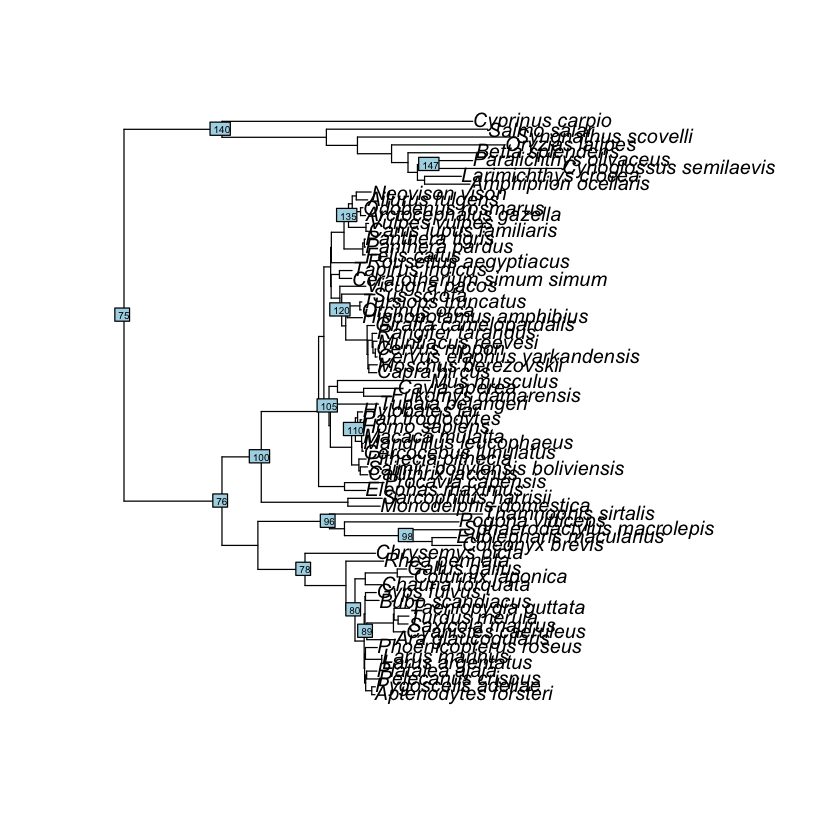

In [4]:
calibrate_tree("./data/bergeron_tree.nwk", "./output/calibrated_bergeron_tree.nwk")